In [ ]:
# Importing Required Librabies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Load train and Test set
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
# Check the numbers of samples and features

print("The train data size  : {} ".format(train.shape))
print("The test data size  : {} ".format(test.shape))

The train data size  : (1022, 27) 
The test data size  : (438, 27) 


In [ ]:
# Saving the 'Id' column which will be useless for training
train_ID = train['Id']
test_ID = test['Id']

In [ ]:
# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [ ]:
train.head(20)

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,8450,7,5,706,150,856,856,854,1710,...,2,548,0,61,0,0,0,0,0,208500
1,20,9600,6,8,978,284,1262,1262,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,11250,7,5,486,434,920,920,866,1786,...,2,608,0,42,0,0,0,0,0,223500
3,70,9550,7,5,216,540,756,961,756,1717,...,3,642,0,35,272,0,0,0,0,140000
4,60,14260,8,5,655,490,1145,1145,1053,2198,...,3,836,192,84,0,0,0,0,0,250000
5,50,14115,5,5,732,64,796,796,566,1362,...,2,480,40,30,0,320,0,0,700,143000
6,20,10084,8,5,1369,317,1686,1694,0,1694,...,2,636,255,57,0,0,0,0,0,307000
7,60,10382,7,6,859,216,1107,1107,983,2090,...,2,484,235,204,228,0,0,0,350,200000
8,50,6120,7,5,0,952,952,1022,752,1774,...,2,468,90,0,205,0,0,0,0,129900
9,190,7420,5,6,851,140,991,1077,0,1077,...,1,205,0,4,0,0,0,0,0,118000


In [ ]:
test.head(20)

,index,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1022,50,9439,5,5,324,588,912,912,336,...,0,1,160,0,0,192,0,0,0,0
1,1023,120,3182,7,5,16,1330,1346,1504,0,...,1,2,437,156,20,0,0,0,0,0
2,1024,20,15498,8,6,1165,0,1565,2898,0,...,1,2,665,0,72,174,0,0,0,0
3,1025,20,7700,5,5,138,276,882,882,0,...,0,2,461,96,0,0,0,0,0,0
4,1026,20,9300,5,5,697,571,1268,1264,0,...,2,2,461,0,0,0,0,143,0,0
5,1027,20,9520,8,5,1513,125,1638,1646,0,...,1,3,800,192,44,0,0,0,0,0
6,1028,50,9492,5,5,368,359,768,968,408,...,1,1,240,0,0,0,0,0,0,0
7,1029,160,1680,6,7,317,355,672,672,546,...,0,1,264,0,28,0,0,0,0,0
8,1030,190,7082,5,8,0,686,686,948,980,...,0,0,0,0,0,228,0,0,0,0
9,1031,75,15863,7,3,523,301,824,1687,998,...,2,2,672,136,63,0,0,0,0,0


As we can observe here that, in test data there is no SalePrice column which we need to predict using our model 

###  Analyzing the Test or target Variable (Sale Price)

In [ ]:
train['SalePrice'].describe()

count      1022.000000
mean     181713.254403
std       79854.663341
min       34900.000000
25%      130000.000000
50%      163745.000000
75%      214975.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 181713.25 and sigma = 79815.59



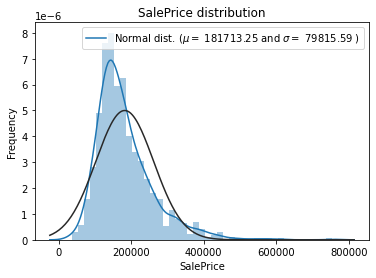

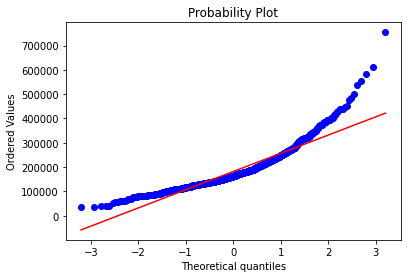

Skewness: 1.738982
Kurtosis: 5.371961


In [ ]:
from scipy import stats
from scipy.stats import norm
# Plot Histogram
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Here by Looking at the kurtosis score, we can see that there is a very high peak. However, in skewness score, we can see that the sale prices deviate from the normal distribution. Going to have to fix this later! As We want our data to be as "normal" as possible

### Multivariable Analysis

In [ ]:
# Checking Numerical Data
# As in our given dataset all the variables are numercial in nature
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [ ]:
#Total number of features
num = len(train.select_dtypes(include=['int64','float64']).columns)
num

26

As we can observe here there are a total of 26 features, out of them only few features or variables effect the final prediction. so now we'll find which features effect the prediction most using heatmap visualization

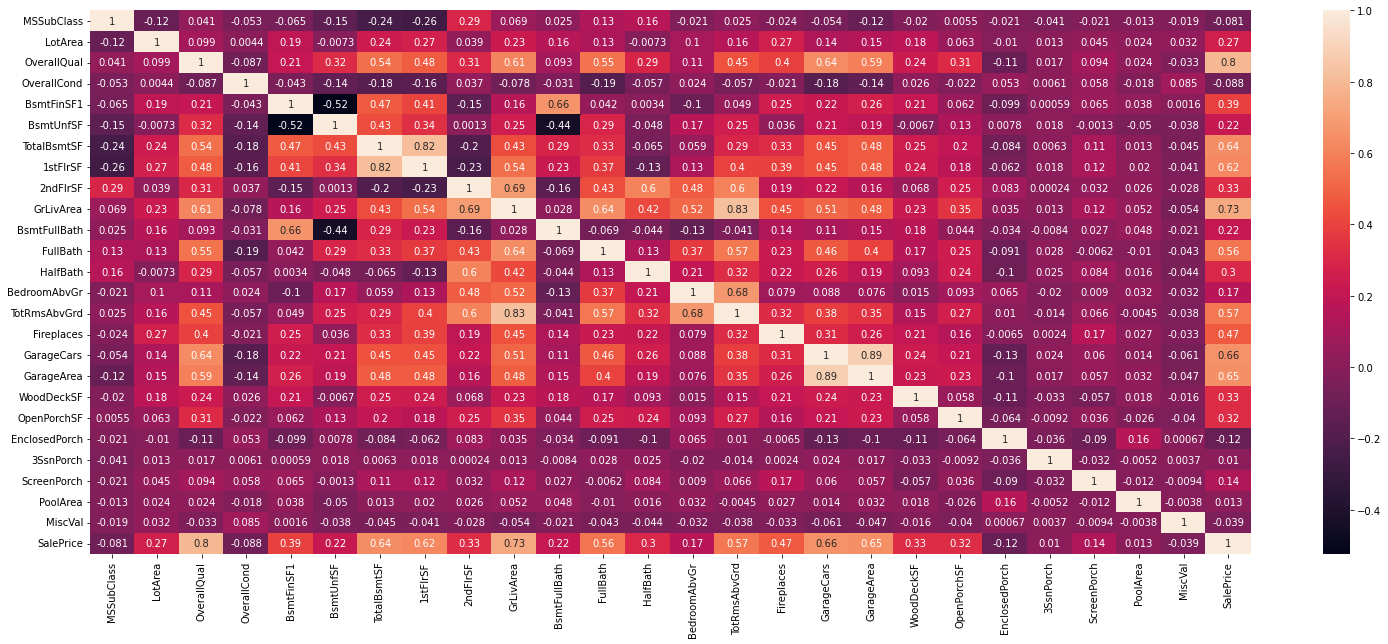

In [ ]:
# Correlation Matrix Heatmap
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(26, 10))
sns.heatmap(corr_matrix, annot = True);

Here our target (dependent variable) is SalePrice and from above figure we find out strong and weak correlation with independent variable and set threshold

In [ ]:
threshold=0.6
a=abs(corr_matrix['SalePrice'])
result=a[a>0.6]
result

OverallQual    0.796571
TotalBsmtSF    0.639624
1stFlrSF       0.623746
GrLivArea      0.734387
GarageCars     0.658611
GarageArea     0.648605
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [ ]:
train[['GarageArea','GarageCars']].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.886275
GarageCars,0.886275,1.000000


In [ ]:
train[['GarageArea','GrLivArea']].corr()


,GarageArea,GrLivArea
GarageArea,1.000000,0.482594
GrLivArea,0.482594,1.000000


In [ ]:
train[['GarageArea','1stFlrSF']].corr()


,GarageArea,1stFlrSF
GarageArea,1.000000,0.477683
1stFlrSF,0.477683,1.000000


In [ ]:
train[['GarageArea','OverallQual']].corr()

,GarageArea,OverallQual
GarageArea,1.000000,0.590386
OverallQual,0.590386,1.000000


In [ ]:
train[['GarageArea','TotalBsmtSF']].corr()

,GarageArea,TotalBsmtSF
GarageArea,1.000000,0.480865
TotalBsmtSF,0.480865,1.000000


In [ ]:
train[['TotalBsmtSF','OverallQual']].corr()

,TotalBsmtSF,OverallQual
TotalBsmtSF,1.000000,0.538608
OverallQual,0.538608,1.000000


In [ ]:
train[['1stFlrSF','OverallQual']].corr()

,1stFlrSF,OverallQual
1stFlrSF,1.000000,0.476334
OverallQual,0.476334,1.000000


In [ ]:
train[['GrLivArea','OverallQual']].corr()

,GrLivArea,OverallQual
GrLivArea,1.000000,0.608713
OverallQual,0.608713,1.000000


In [ ]:
train[['GarageArea','OverallQual']].corr()

,GarageArea,OverallQual
GarageArea,1.000000,0.590386
OverallQual,0.590386,1.000000


In [ ]:
train[['GarageCars','OverallQual']].corr()

,GarageCars,OverallQual
GarageCars,1.000000,0.635647
OverallQual,0.635647,1.000000


In [ ]:
# # Top 10 Heatmap
# k = 10 #number of variables for heatmap
# cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corr(train[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

### comparing the correaltion between the independent variables

In [ ]:
train.drop(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace=True, axis=1)
train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,SalePrice
0,7,856,856,2,548,208500
1,6,1262,1262,2,460,181500
2,7,920,920,2,608,223500
3,7,756,961,3,642,140000
4,8,1145,1145,3,836,250000


In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from scipy import stats
import random
import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import Image, HTML
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

In [ ]:
import statsmodels.api as sm
removefeats= [["Id", 'OverallQual'	,'TotalBsmtSF'	,'1stFlrSF',	'GarageCars',	'GarageArea']]
X1_var = train[[ 'OverallQual'	,'TotalBsmtSF'	,'1stFlrSF',	'GarageCars',	'GarageArea']]
y_var = train['SalePrice']
sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from termcolor import colored as cl
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     573.3
Date:                Tue, 17 May 2022   Prob (F-statistic):          9.39e-293
Time:                        08:19:14   Log-Likelihood:                -12301.
No. Observations:                1022   AIC:                         2.461e+04
Df Residuals:                    1016   BIC:                         2.464e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.095e+05   6237.236    -17.562      

In [ ]:
test.drop(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace=True, axis=1)
test.head()

,index,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea
0,1022,5,912,912,1,160
1,1023,7,1346,1504,2,437
2,1024,8,1565,2898,2,665
3,1025,5,882,882,2,461
4,1026,5,1268,1264,2,461


In [ ]:
test_ID = test["index"]

In [ ]:
reg = LinearRegression()
reg.fit(X1_var[['OverallQual'	,'TotalBsmtSF'	,'1stFlrSF',	'GarageCars',	'GarageArea']], y_var)
# y_test = test['OverallQual'	,'TotalBsmtSF'	,'1stFlrSF',	'GarageCars',	'GarageArea']
y_predicted = reg.predict(test[['OverallQual'	,'TotalBsmtSF'	,'1stFlrSF',	'GarageCars',	'GarageArea']])
# print("Mean squared error: %.2f" % mean_squared_error(test, y_predicted))
# print('R²: %.2f' % r2_score(test, y_predicted))
y_predicted

array([113247.22631711, 228653.91005529, 332022.06532622, 134700.18746962,
       157915.13276877, 296445.74063468, 116666.5004231 , 133799.84867963,
        93901.03541555, 237617.10010642, 278335.28189255, 271614.11355188,
       118928.75774972,  69305.25637246, 330488.94246668, 256680.09722553,
        54817.89232904,  71925.36916062, 179040.77549432, 161002.22704024,
       198258.83199829, 235875.31603288, 328539.78479181,  92986.42524456,
       343775.90927623, 151197.35710183, 149471.68401925,  73710.81425294,
       219330.82129772, 220367.60388028, 177625.46155494, 154257.11791872,
       243323.26460207, 198332.36419789, 225351.16577079, 201114.95970564,
       296733.91087066, 171945.01667075, 258583.95323712, 121258.54644281,
       157841.97546095, 177280.80975038, 152073.25435336, 224149.58093741,
       156034.93542103, 158562.25332968, 188546.38841771, 139892.84808035,
       127430.22495187, 158819.02969275, 120763.17467439, 152597.67103706,
       243044.36964046, 1

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_predicted
sub.to_csv('submission.csv',index=False)

## Now we will use these regression methods and choose the best:
1. Decision Trees
2. Random Forest
3. XGBoost**

In [ ]:
### importing the required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np


In [ ]:
## importing the data and selecting the independent and independent variables 

train_data = pd.read_csv('/content/train.csv')
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
test = pd.read_csv('/content/test.csv')
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
## splitting the data for training and testing and cleaning it using imputation 

train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)


In [ ]:
X

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,72,1,37.588179,0,0,0,1,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.00,55
1,1,139812,75,2,NaN,0,0,0,0,1,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.00,55
2,1,109787,83,2,26.572634,0,0,0,0,1,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.50,35
3,1,130587,43,2,83.264629,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.00,55
4,1,138290,75,2,31.824842,1,0,0,0,1,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.00,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1,148154,64,1,23.799788,1,0,0,1,0,...,141.600000,8.440000,98.200000,17.400000,1.980000,NaN,30.600000,NaN,45.54,35
821,1,160890,35,2,25.785124,0,0,0,0,1,...,136.000000,8.055556,105.888889,14.222222,2.090000,NaN,20.222222,NaN,NaN,35
822,1,144022,89,2,NaN,0,0,0,1,1,...,138.000000,9.537500,97.454545,16.909091,2.214286,NaN,28.000000,NaN,NaN,25
823,1,143030,77,1,28.564343,1,1,0,0,1,...,137.625000,9.025000,95.000000,18.125000,2.100000,NaN,28.750000,NaN,NaN,50


In [1]:
## making predictions using the Decision Tree algorithm 

decision_model = DecisionTreeRegressor()  
decision_model.fit(train_X, train_y) 
predicted_decision_trees = decision_model.predict(test_X)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(test_y, predicted_decision_trees))

In [ ]:
## making predictions using the Random Forest algorithm 

forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(train_X, train_y )
predicted_random_forest = forest_model.predict(test_X)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(test_y, predicted_random_forest))

Mean Absolute Error using Random Forest: 21312.07219161168


In [ ]:
## making predictions using the XGBoost algorithm 

xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(train_X, train_y)
predicted_XGBoost = xg_model.predict(test_X)
print("Mean Absolute Error using XGBoost: ", mean_absolute_error(test_y, predicted_XGBoost))

[20:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error using XGBoost:  0.2019576571222876


Since XgBoost has least Mean Absolute Error we opt this model

array([[1.00000000e+00, 1.67683000e+05, 8.90000000e+01, ...,
        8.50000000e-01, 4.01111111e+01, 5.50000000e+01],
       [2.00000000e+00, 1.33745000e+05, 8.10000000e+01, ...,
        2.10000000e+00, 6.08333333e+01, 5.50000000e+01],
       [2.00000000e+00, 1.14483000e+05, 6.50000000e+01, ...,
        1.00000000e+00, 5.50000000e+01, 5.50000000e+01],
       ...,
       [2.00000000e+00, 1.32936000e+05, 8.30000000e+01, ...,
                   nan, 5.00000000e+01, 5.00000000e+01],
       [1.00000000e+00, 1.08841000e+05, 9.00000000e+01, ...,
        1.67500000e+00, 3.23846154e+01, 4.50000000e+01],
       [1.00000000e+00, 1.66280000e+05, 7.80000000e+01, ...,
        1.80000000e+00, 4.50000000e+01, 3.50000000e+01]])

In [ ]:
test.drop("index", axis = 1, inplace = True)

In [ ]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(train_X, train_y) 


[20:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
predicted_XGBoost = xg_model.predict(test.values)
# predictions = my_model.predict(test_data_process.values)  

In [ ]:
# Saving the predicted data to csv
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predicted_XGBoost
sub.to_csv('submission.csv',index=False)